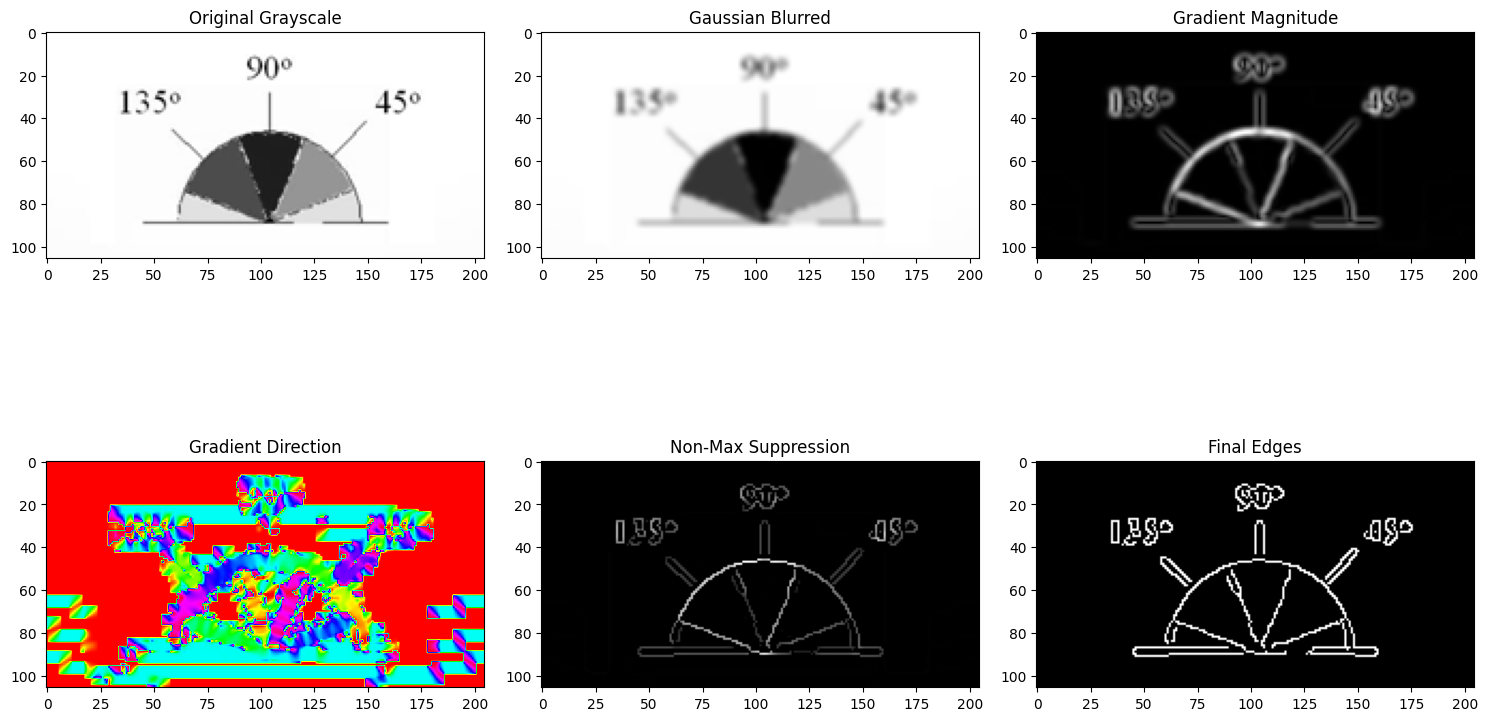

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
img = Image.open("C:\\Users\\ASUS\\Downloads\\Screenshot_1.png").convert('L')
img_np = np.array(img, dtype=np.float32)
gaussian_kernel = (1/159) * np.array([
    [2,  4,  5,  4, 2],
    [4,  9, 12,  9, 4],
    [5, 12, 15, 12, 5],
    [4,  9, 12,  9, 4],
    [2,  4,  5,  4, 2]
])
blurred = convolve(img_np, gaussian_kernel)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)
sobel_y = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
], dtype=np.float32)
gx = convolve(blurred, sobel_x)
gy = convolve(blurred, sobel_y)
magnitude = np.hypot(gx, gy)
magnitude = magnitude / magnitude.max() * 255
theta = np.arctan2(gy, gx)
angle = np.rad2deg(theta) % 180
def non_max_suppression(mag, ang):
    H, W = mag.shape
    Z = np.zeros((H, W), dtype=np.float32)
    for i in range(1, H-1):
        for j in range(1, W-1):
            q = 255
            r = 255
            angle = ang[i, j]
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = mag[i, j+1]
                r = mag[i, j-1]
            elif (22.5 <= angle < 67.5):
                q = mag[i+1, j-1]
                r = mag[i-1, j+1]
            elif (67.5 <= angle < 112.5):
                q = mag[i+1, j]
                r = mag[i-1, j]
            elif (112.5 <= angle < 157.5):
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]

            if (mag[i, j] >= q) and (mag[i, j] >= r):
                Z[i, j] = mag[i, j]
            else:
                Z[i, j] = 0
    return Z
nms = non_max_suppression(magnitude, angle)
def hysteresis(img, lowThreshold, highThreshold):
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.uint8)
    strong = 255
    weak = 75
    strong_i, strong_j = np.where(img >= highThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    for i in range(1, M-1):
        for j in range(1, N-1):
            if res[i,j] == weak:
                if np.any(res[i-1:i+2, j-1:j+2] == strong):
                    res[i,j] = strong
                else:
                    res[i,j] = 0
    return res
edges = hysteresis(nms, 20, 40)
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1); plt.imshow(img_np, cmap='gray'); plt.title("Original Grayscale")
plt.subplot(2,3,2); plt.imshow(blurred, cmap='gray'); plt.title("Gaussian Blurred")
plt.subplot(2,3,3); plt.imshow(magnitude, cmap='gray'); plt.title("Gradient Magnitude")
plt.subplot(2,3,4); plt.imshow(angle, cmap='hsv'); plt.title("Gradient Direction")
plt.subplot(2,3,5); plt.imshow(nms, cmap='gray'); plt.title("Non-Max Suppression")
plt.subplot(2,3,6); plt.imshow(edges, cmap='gray'); plt.title("Final Edges")
plt.tight_layout(); plt.show()

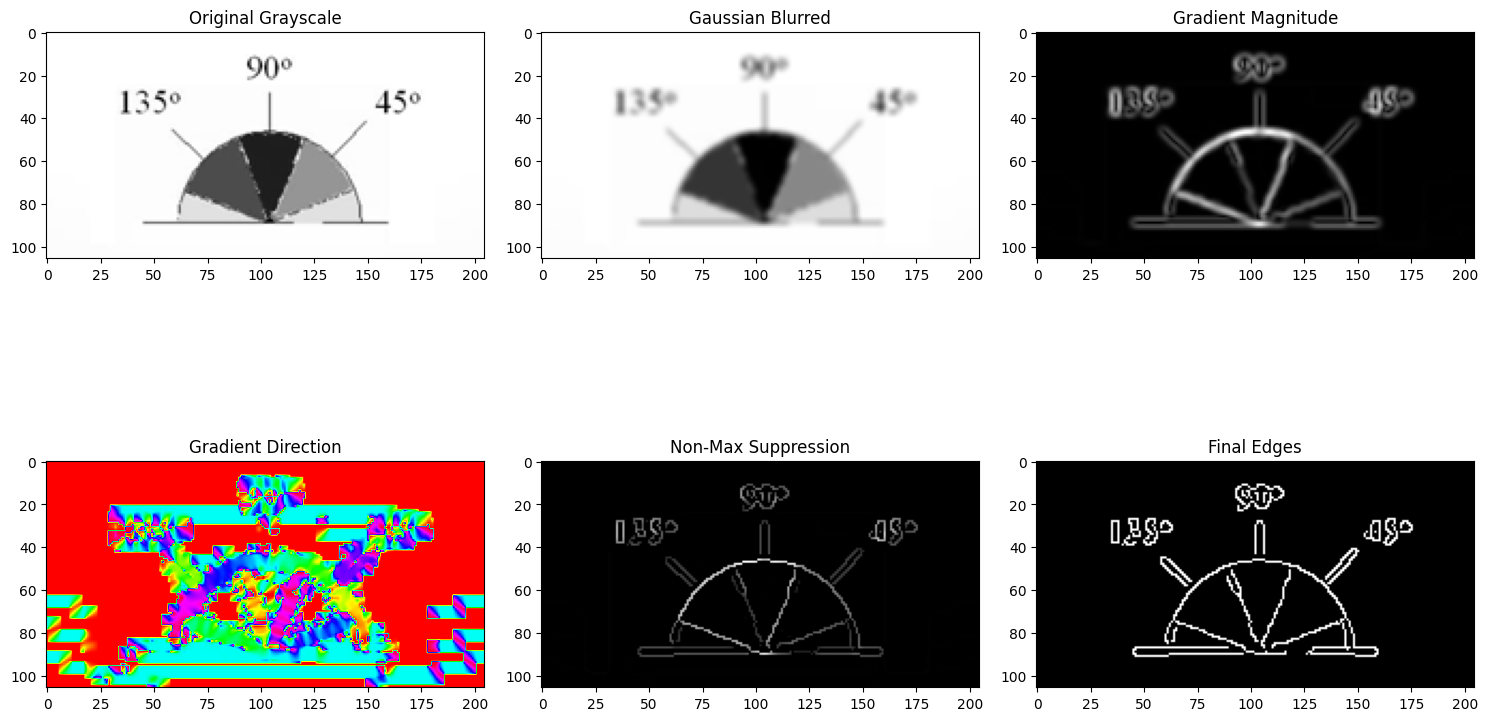

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
img = Image.open("C:\\Users\\ASUS\\Downloads\\Screenshot_1.png").convert('L')
img_np = np.array(img, dtype=np.float32)
gaussian_kernel = (1/159) * np.array([
    [2,  4,  5,  4, 2],
    [4,  9, 12,  9, 4],
    [5, 12, 15, 12, 5],
    [4,  9, 12,  9, 4],
    [2,  4,  5,  4, 2]
])
blurred = convolve(img_np, gaussian_kernel)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)
sobel_y = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
], dtype=np.float32)
gx = convolve(blurred, sobel_x)
gy = convolve(blurred, sobel_y)
magnitude = np.hypot(gx, gy)
magnitude = magnitude / magnitude.max() * 255
theta = np.arctan2(gy, gx)
angle = np.rad2deg(theta) % 180
def non_max_suppression_6bins(mag, ang):
    H, W = mag.shape
    Z = np.zeros((H, W), dtype=np.float32)
    for i in range(1, H-1):
        for j in range(1, W-1):
            angle = ang[i, j]
            q = 255
            r = 255
            if (0 <= angle < 30) or (150 <= angle <= 180):
                q = mag[i, j+1]
                r = mag[i, j-1]
            elif (30 <= angle < 60):
                q = mag[i+1, j-1]
                r = mag[i-1, j+1]
            elif (60 <= angle < 90):
                q = mag[i+1, j]
                r = mag[i-1, j]
            elif (90 <= angle < 120):
                q = mag[i+1, j]
                r = mag[i-1, j]
            elif (120 <= angle < 150):
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]

            if (mag[i, j] >= q) and (mag[i, j] >= r):
                Z[i, j] = mag[i, j]
            else:
                Z[i, j] = 0
    return Z
nms = non_max_suppression(magnitude, angle)
def hysteresis(img, lowThreshold, highThreshold):
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.uint8)
    strong = 255
    weak = 75
    strong_i, strong_j = np.where(img >= highThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    for i in range(1, M-1):
        for j in range(1, N-1):
            if res[i,j] == weak:
                if np.any(res[i-1:i+2, j-1:j+2] == strong):
                    res[i,j] = strong
                else:
                    res[i,j] = 0
    return res
edges = hysteresis(nms, 20, 40)
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1); plt.imshow(img_np, cmap='gray'); plt.title("Original Grayscale")
plt.subplot(2,3,2); plt.imshow(blurred, cmap='gray'); plt.title("Gaussian Blurred")
plt.subplot(2,3,3); plt.imshow(magnitude, cmap='gray'); plt.title("Gradient Magnitude")
plt.subplot(2,3,4); plt.imshow(angle, cmap='hsv'); plt.title("Gradient Direction")
plt.subplot(2,3,5); plt.imshow(nms, cmap='gray'); plt.title("Non-Max Suppression")
plt.subplot(2,3,6); plt.imshow(edges, cmap='gray'); plt.title("Final Edges")
plt.tight_layout(); plt.show()

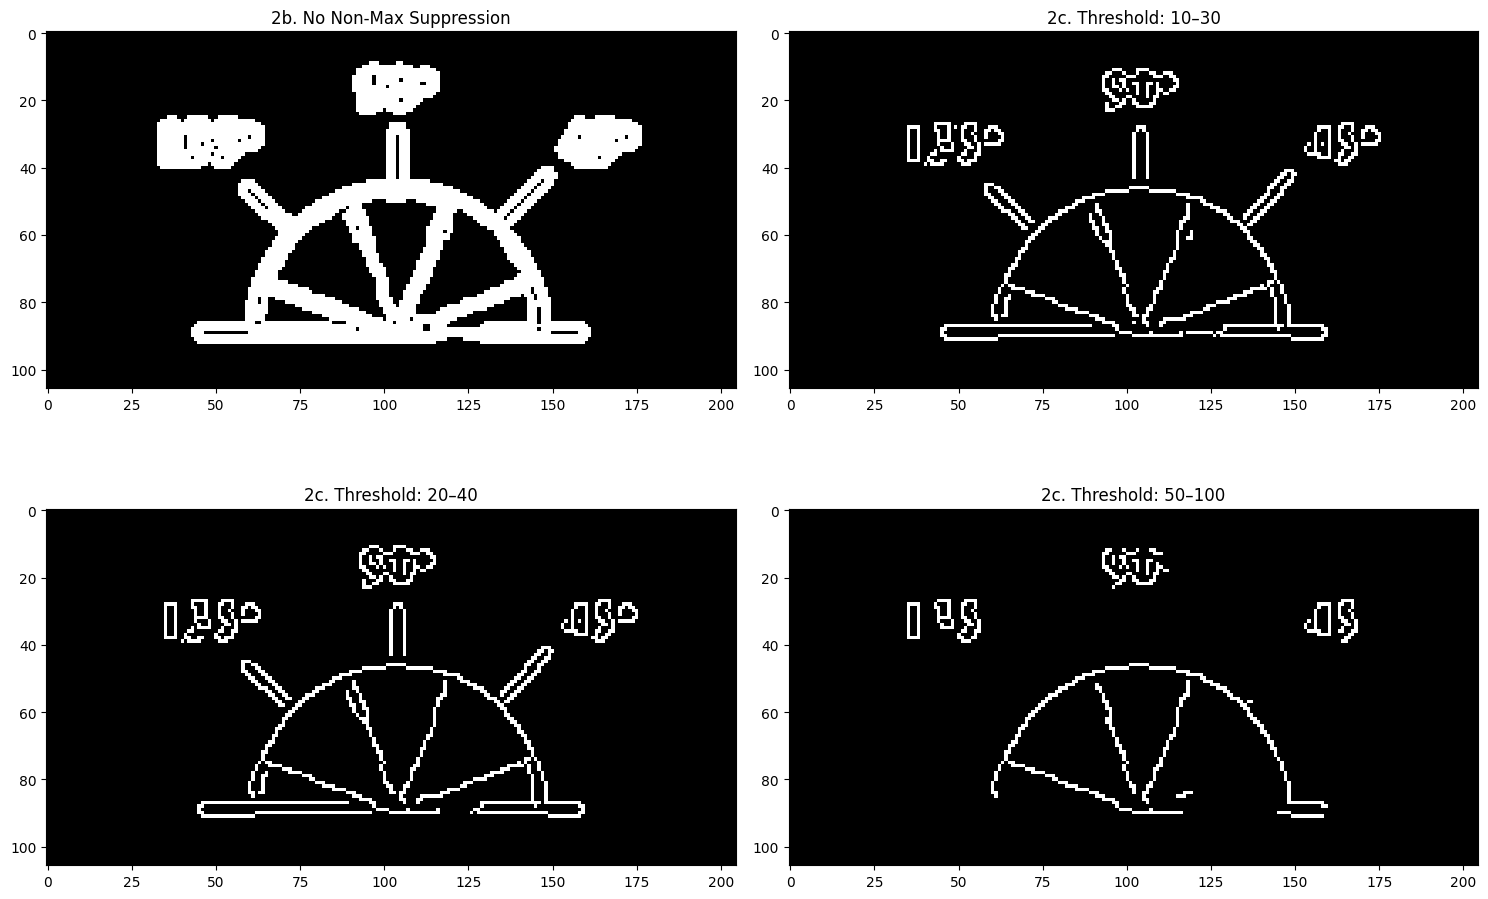

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
img = Image.open("C:\\Users\\ASUS\\Downloads\\Screenshot_1.png").convert('L')
img_np = np.array(img, dtype=np.float32)
gaussian_kernel = (1/159) * np.array([
    [2,  4,  5,  4, 2],
    [4,  9, 12,  9, 4],
    [5, 12, 15, 12, 5],
    [4,  9, 12,  9, 4],
    [2,  4,  5,  4, 2]
])
blurred = convolve(img_np, gaussian_kernel)
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[ 1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
gx = convolve(blurred, sobel_x)
gy = convolve(blurred, sobel_y)
magnitude = np.hypot(gx, gy)
magnitude = magnitude / magnitude.max() * 255
theta = np.arctan2(gy, gx)
angle = np.rad2deg(theta) % 180
def non_max_suppression(mag, ang):
    H, W = mag.shape
    Z = np.zeros((H, W), dtype=np.float32)
    for i in range(1, H-1):
        for j in range(1, W-1):
            angle = ang[i, j]
            q = 255
            r = 255
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = mag[i, j+1]
                r = mag[i, j-1]
            elif (22.5 <= angle < 67.5):
                q = mag[i+1, j-1]
                r = mag[i-1, j+1]
            elif (67.5 <= angle < 112.5):
                q = mag[i+1, j]
                r = mag[i-1, j]
            elif (112.5 <= angle < 157.5):
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]

            if (mag[i, j] >= q) and (mag[i, j] >= r):
                Z[i, j] = mag[i, j]
            else:
                Z[i, j] = 0
    return Z
def hysteresis(img, lowThreshold, highThreshold):
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.uint8)
    strong = 255
    weak = 75

    strong_i, strong_j = np.where(img >= highThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    for i in range(1, M-1):
        for j in range(1, N-1):
            if res[i,j] == weak:
                if np.any(res[i-1:i+2, j-1:j+2] == strong):
                    res[i,j] = strong
                else:
                    res[i,j] = 0
    return res
edges_without_nms = hysteresis(magnitude, 20, 40)
nms = non_max_suppression(magnitude, angle)
edges_10_30 = hysteresis(nms, 10, 30)
edges_20_40 = hysteresis(nms, 20, 40)
edges_50_100 = hysteresis(nms, 50, 100)

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1); plt.imshow(edges_without_nms, cmap='gray'); plt.title("2b. No Non-Max Suppression")
plt.subplot(2,2,2); plt.imshow(edges_10_30, cmap='gray'); plt.title("2c. Threshold: 10–30")
plt.subplot(2,2,3); plt.imshow(edges_20_40, cmap='gray'); plt.title("2c. Threshold: 20–40")
plt.subplot(2,2,4); plt.imshow(edges_50_100, cmap='gray'); plt.title("2c. Threshold: 50–100")
plt.tight_layout(); plt.show()
